In [1]:

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.layers import Flatten, Dense, Dropout ,UpSampling2D, Conv2D
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.optimizers import SGD
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape, Permute

import matplotlib
matplotlib.use('qt5agg')
import matplotlib.pyplot as plt

import sys
import numpy as np
# import matplotlib.pyplot as plt 

%matplotlib inline


Using TensorFlow backend.


In [2]:
data_path = '/media/pawan/0B6F079E0B6F079E/PYTHON_SCRIPTS/Data science challenges/learning_tensorflow_local/'
img_path  = data_path +'/'+'more_codes/images/cat.jpg'
img_path2  = data_path +'/'+'more_codes/images/cat_annotation.png'
vgg_model = VGG16(weights=None, include_top=False,input_shape = (224,224,3))
vgg_model.load_weights('/media/pawan/0B6F079E0B6F079E/PYTHON_SCRIPTS/Data science challenges/learning_tensorflow_local/data/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

train_img = image.load_img(img_path, target_size=(224, 224,3))
x = image.img_to_array(train_img)
label_img = image.load_img(img_path2, target_size=(224, 224,3))
y = image.img_to_array(label_img)

# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
x = x.reshape(1,x.shape[0], x.shape[0], x.shape[-1])
y = y.reshape(1,y.shape[0], y.shape[0], y.shape[-1])

y.shape

# y = np.expand_dims(y, axis=0)
# x = preprocess_input(y)
# x2 = x.reshape(x.shape[1], x.shape[1], x.shape[-1])
# x.shape

# plt.imshow(x2)
# plt.show()


(1, 224, 224, 3)

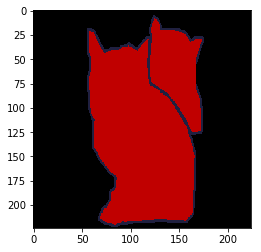

In [3]:
y_image = y.reshape(y.shape[1], y.shape[2], y.shape[-1])
# y_image.shape
np.unique(y_image)


plt.figure()
plt.imshow(y_image)
plt.show()


newy = y_image==[0,0,0]




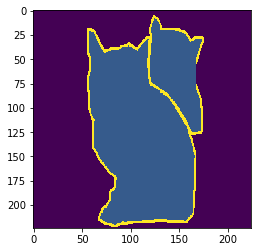

In [4]:
channels_R= y_image[:,:,0]
channels_G =y_image[:,:,1]
channels_B = y_image[:,:,2] 


plt.figure()
plt.imshow(channels_R)
plt.show()

background  = np.where(channels_R !=0 )


y_index  = np.zeros([newy.shape[0],newy.shape[0],2])
y_index[background[0],background[1],0  ] = 1 
np.unique(y_index[:,:,1])
flattened_y = y_index.reshape([-1,y_index.shape[0]*y_index.shape[0],2])
# flattened_y = np.array(flattened_y)
flattened_y.shape
# plt.imshow(y_index[:,:,1])
plt.show()

In [11]:

last = vgg_model.output
last= Conv2D(512,2,strides= (1,1),padding='SAME', activation ='relu' )(last)
last = UpSampling2D(size =(6,6),data_format = None)(last)
last= Conv2D(256,2,strides= (1,1),padding='SAME', activation ='relu' )(last)
last = UpSampling2D(size =(6,6),data_format = None)(last)
print(last.shape)

last= Conv2D(2,2,strides= (1,1),padding='SAME', activation ='relu' )(last)
last = UpSampling2D(size =(32,32),data_format = None)(last)
print(last.shape[1]*last.shape[1])

final_shape = (50176,2)
print(final_shape)
flat_x = Reshape(final_shape)(last)

preds = Dense(2,activation='softmax')(flat_x)
print(flat_x)
print(preds)

model2 = Model(vgg_model.input, output= preds)


sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer=sgd, loss='categorical_crossentropy')

# model2.fit(x,flattened_y,epochs = 10)

# output = model2.predict(x)
# print(output.shape)


(?, 252, 252, 256)
65028096
(50176, 2)


ValueError: total size of new array must be unchanged

In [6]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
from keras import backend as K

get_layer_output = K.function([model2.layers[0].input],
                                  [model2.layers[-3].output])
layer_output = get_layer_output([x])[0]
layer_output.shape

(1, 224, 224, 2)

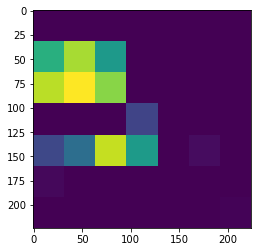

[  0.           0.37186825   0.83761275   1.25339448   7.97870207
   8.42337418  14.1270504   21.03084946  21.26552391  24.72253609
  32.1300354   33.99184799  35.09770584  35.63201141  39.08741379]


In [8]:
# output[np.where(output==1)] = 255
output_full = layer_output.reshape([224,224,2])
output_full.shape
index = 0
plt.imshow(output_full[:,:,index])
plt.show()
print(np.unique(output_full[:,:,index]))

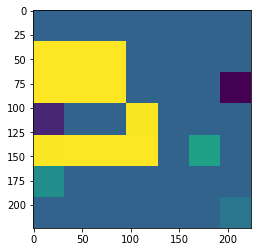

[ 0.26629925  0.34574944  0.50040042  0.5534448   0.62882787  0.68742079
  0.99336088  0.99496931  0.99985886  0.99999809  0.99999845  0.99999976
  1.        ]


In [9]:
output_image = output.reshape([224,224,2])
output_image.shape
index = 0
plt.imshow(output_image[:,:,index])
plt.show()
print(np.unique(output_image[:,:,index]))